In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [77]:
# Read Data
data = "https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/857035/anon_set_50k_2019.csv"

In [78]:
# Create a DataFrame
df = pd.read_csv(data, delimiter = ',')

In [79]:
df.head

<bound method NDFrame.head of            PROP_TYPE  PROP_AGE_FINAL  IMD_band  FLOOR_AREA_BAND     GOR_EW  \
0           Bungalow             102         4                2  E12000001   
1           Bungalow             102         1                2  E12000001   
2           Bungalow             102         5                2  E12000001   
3           Bungalow             102         2                2  E12000001   
4           Bungalow             102         3                2  E12000001   
...              ...             ...       ...              ...        ...   
55149  Semi detached             104         4                2  W99999999   
55150  Semi detached             104         3                2  W99999999   
55151  Semi detached             104         2                3  W99999999   
55152  Semi detached             104         5                3  W99999999   
55153  Semi detached             104         4                4  W99999999   

      band  LI_FLAG  LI_DATE  CWI

In [80]:
df.columns

Index(['PROP_TYPE', 'PROP_AGE_FINAL', 'IMD_band', 'FLOOR_AREA_BAND', 'GOR_EW',
       'band', 'LI_FLAG', 'LI_DATE', 'CWI_FLAG', 'CWI_DATE', 'PV_FLAG',
       'PV_DATE', 'CONS_FLAG', 'MAIN_HEAT_FUEL', 'Gcons2017', 'Gcons2016',
       'Gcons2015', 'Gcons2014', 'Gcons2013', 'Gcons2012', 'Gcons2011',
       'Gcons2010', 'Gcons2009', 'Gcons2008', 'Gcons2007', 'Gcons2006',
       'Gcons2005', 'Econs2017', 'Econs2016', 'Econs2015', 'Econs2014',
       'Econs2013', 'Econs2012', 'Econs2011', 'Econs2010', 'Econs2009',
       'Econs2008', 'Econs2007', 'Econs2006', 'Econs2005', 'GasValFlag2017',
       'GasValFlag2016', 'GasValFlag2015', 'GasValFlag2014', 'GasValFlag2013',
       'GasValFlag2012', 'GasValFlag2011', 'GasValFlag2010', 'GasValFlag2009',
       'GasValFlag2008', 'GasValFlag2007', 'GasValFlag2006',
       'ElectValFlag2017', 'ElectValFlag2016', 'ElectValFlag2015',
       'ElectValFlag2014', 'ElectValFlag2013', 'ElectValFlag2012',
       'ElectValFlag2011', 'ElectValFlag2010', 'ElectVal

In [81]:
#Colomns:

# PROP_AGE_FINAL - pre-1930 1930-1949 1950-1966 1967-1982 1983-1995 1996 onwards
# IMD_band - Index of multiple deprivation (quintiles)
# FLOOR_AREA_BAND - 50m2 bands and category for all over 150m2
# GOR_EW - Region
# band - EE Band (A-F)
# LI_FLAG - Loft insulation installed through a Government scheme (dummy)
# CWI_FLAG - Cavity wall insulation installed through a Government scheme (dummy)
# PV_FLAG - Photovoltaics (dummy)
# CONS_FLAG - ? (dummy)
# MAIN_HEAT_FUEL - Gas/other (dummy)
# GconsYEAR - Annual gas consumption in kWh (2005 - 2017)
# EconsYEAR - Annual electricity consumption in kWh (2005 - 2017)
# GasValFlagYEAR - Flag indicating records with valid gas consumption and off gas households (dummy)
# ElectValFlagYEAR - Flag indicating record with valid electricity consumption

#Property age
#101	before 1930
#102	1930-1949 
#103	1950-1966
#104	1967-1982
#105	1983-1995
#106	1996 onwards

#Floor area
#the higher the ratio, the denser is construction (urban area)
#1	1 to 50 m2
#2	51-100 m2
#3	101-150 m2
#4	Over 151 m2

In [83]:
print(df.head())

  PROP_TYPE  PROP_AGE_FINAL  IMD_band  FLOOR_AREA_BAND     GOR_EW band  \
0  Bungalow             102         4                2  E12000001    A   
1  Bungalow             102         1                2  E12000001    A   
2  Bungalow             102         5                2  E12000001    B   
3  Bungalow             102         2                2  E12000001    A   
4  Bungalow             102         3                2  E12000001    C   

   LI_FLAG  LI_DATE  CWI_FLAG  CWI_DATE  ...  ElectValFlag2015  \
0        0      NaN         0       NaN  ...                 V   
1        0      NaN         0       NaN  ...                 V   
2        0      NaN         0       NaN  ...                 V   
3        0      NaN         0       NaN  ...                 V   
4        1   2008.0         1    2012.0  ...                 V   

   ElectValFlag2014  ElectValFlag2013  ElectValFlag2012  ElectValFlag2011  \
0                 V                 V                 V                 V   
1   

In [84]:
print(df.tail())

           PROP_TYPE  PROP_AGE_FINAL  IMD_band  FLOOR_AREA_BAND     GOR_EW  \
55149  Semi detached             104         4                2  W99999999   
55150  Semi detached             104         3                2  W99999999   
55151  Semi detached             104         2                3  W99999999   
55152  Semi detached             104         5                3  W99999999   
55153  Semi detached             104         4                4  W99999999   

      band  LI_FLAG  LI_DATE  CWI_FLAG  CWI_DATE  ...  ElectValFlag2015  \
55149    C        0      NaN         0       NaN  ...                 V   
55150    C        0      NaN         0       NaN  ...                 V   
55151    C        0      NaN         0       NaN  ...                 V   
55152    C        0      NaN         0       NaN  ...                 V   
55153    G        0      NaN         0       NaN  ...                 V   

       ElectValFlag2014  ElectValFlag2013  ElectValFlag2012  ElectValFlag2011  \

In [85]:
df.describe()

,PROP_AGE_FINAL,IMD_band,FLOOR_AREA_BAND,LI_FLAG,LI_DATE,CWI_FLAG,CWI_DATE,PV_FLAG,PV_DATE,CONS_FLAG,...,Econs2014,Econs2013,Econs2012,Econs2011,Econs2010,Econs2009,Econs2008,Econs2007,Econs2006,Econs2005
count,55154.000000,55154.000000,55154.000000,55154.000000,12062.000000,55154.000000,11711.000000,55154.000000,1508.000000,55154.000000,...,51485.000000,51447.000000,51207.000000,51135.000000,50872.000000,50364.000000,49574.000000,49662.000000,49469.000000,48219.000000
mean,102.166878,2.982449,2.323331,0.218697,2009.217957,0.212333,2008.322517,0.027342,2012.997347,0.042263,...,4374.334272,4365.387681,4432.645927,4498.629119,4572.187058,4604.266937,4637.715335,4837.561919,4877.970042,5052.174454
std,0.919315,1.408246,0.823862,0.413366,3.167596,0.408963,4.131970,0.163078,1.811266,0.201191,...,3590.922701,3533.279329,3663.567958,3609.604820,3722.687759,3839.609741,3839.338000,4004.961563,3937.234660,4185.783154
min,101.000000,1.000000,1.000000,0.000000,2000.000000,0.000000,2000.000000,0.000000,2005.000000,0.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
25%,101.000000,2.000000,2.000000,0.000000,2007.000000,0.000000,2005.000000,0.000000,2011.000000,0.000000,...,2300.000000,2300.000000,2300.000000,2400.000000,2400.000000,2400.000000,2400.000000,2500.000000,2500.000000,2500.000000
50%,102.000000,3.000000,2.000000,0.000000,2010.000000,0.000000,2008.000000,0.000000,2013.000000,0.000000,...,3400.000000,3500.000000,3500.000000,3600.000000,3600.000000,3600.000000,3600.000000,3800.000000,3800.000000,3900.000000
75%,103.000000,4.000000,3.000000,0.000000,2012.000000,0.000000,2011.000000,0.000000,2015.000000,0.000000,...,5200.000000,5200.000000,5200.000000,5400.000000,5500.000000,5500.000000,5600.000000,5800.000000,5900.000000,6100.000000
max,104.000000,5.000000,4.000000,1.000000,2018.000000,1.000000,2018.000000,1.000000,2018.000000,1.000000,...,50000.000000,50000.000000,49000.000000,50000.000000,49000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000


array([[<AxesSubplot:title={'center':'PROP_AGE_FINAL'}>,
        <AxesSubplot:title={'center':'IMD_band'}>,
        <AxesSubplot:title={'center':'FLOOR_AREA_BAND'}>,
        <AxesSubplot:title={'center':'LI_FLAG'}>,
        <AxesSubplot:title={'center':'LI_DATE'}>,
        <AxesSubplot:title={'center':'CWI_FLAG'}>],
       [<AxesSubplot:title={'center':'CWI_DATE'}>,
        <AxesSubplot:title={'center':'PV_FLAG'}>,
        <AxesSubplot:title={'center':'PV_DATE'}>,
        <AxesSubplot:title={'center':'CONS_FLAG'}>,
        <AxesSubplot:title={'center':'MAIN_HEAT_FUEL'}>,
        <AxesSubplot:title={'center':'Gcons2017'}>],
       [<AxesSubplot:title={'center':'Gcons2016'}>,
        <AxesSubplot:title={'center':'Gcons2015'}>,
        <AxesSubplot:title={'center':'Gcons2014'}>,
        <AxesSubplot:title={'center':'Gcons2013'}>,
        <AxesSubplot:title={'center':'Gcons2012'}>,
        <AxesSubplot:title={'center':'Gcons2011'}>],
       [<AxesSubplot:title={'center':'Gcons2010'}>,
    

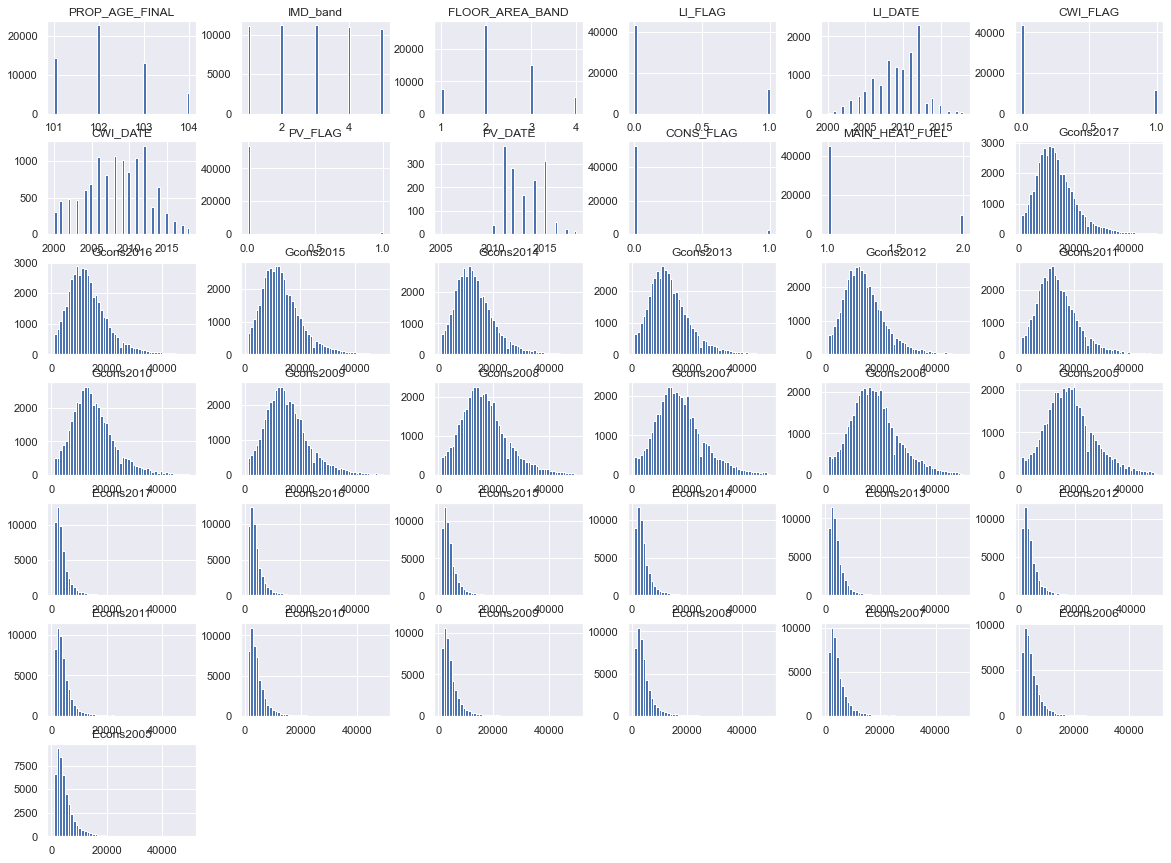

In [86]:
df.hist(bins=50,figsize=(20,15))

array([[<AxesSubplot:xlabel='PROP_AGE_FINAL', ylabel='PROP_AGE_FINAL'>,
        <AxesSubplot:xlabel='IMD_band', ylabel='PROP_AGE_FINAL'>,
        <AxesSubplot:xlabel='FLOOR_AREA_BAND', ylabel='PROP_AGE_FINAL'>,
        ..., <AxesSubplot:xlabel='lat', ylabel='PROP_AGE_FINAL'>,
        <AxesSubplot:xlabel='long', ylabel='PROP_AGE_FINAL'>,
        <AxesSubplot:xlabel='id', ylabel='PROP_AGE_FINAL'>],
       [<AxesSubplot:xlabel='PROP_AGE_FINAL', ylabel='IMD_band'>,
        <AxesSubplot:xlabel='IMD_band', ylabel='IMD_band'>,
        <AxesSubplot:xlabel='FLOOR_AREA_BAND', ylabel='IMD_band'>, ...,
        <AxesSubplot:xlabel='lat', ylabel='IMD_band'>,
        <AxesSubplot:xlabel='long', ylabel='IMD_band'>,
        <AxesSubplot:xlabel='id', ylabel='IMD_band'>],
       [<AxesSubplot:xlabel='PROP_AGE_FINAL', ylabel='FLOOR_AREA_BAND'>,
        <AxesSubplot:xlabel='IMD_band', ylabel='FLOOR_AREA_BAND'>,
        <AxesSubplot:xlabel='FLOOR_AREA_BAND', ylabel='FLOOR_AREA_BAND'>,
        ..., <AxesSubp

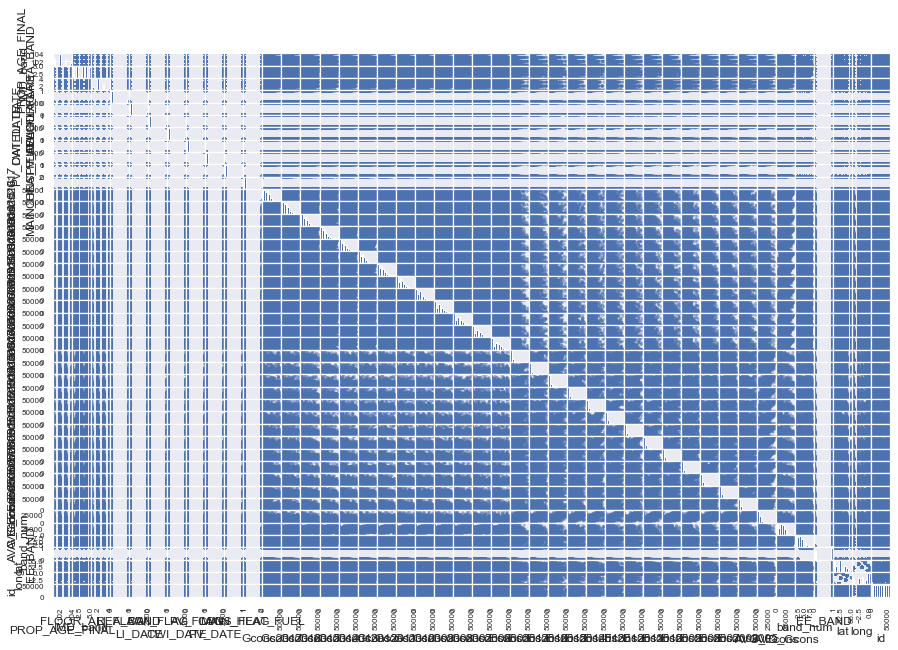

In [198]:
# Creating the scatter matrix:
pd.plotting.scatter_matrix(df)

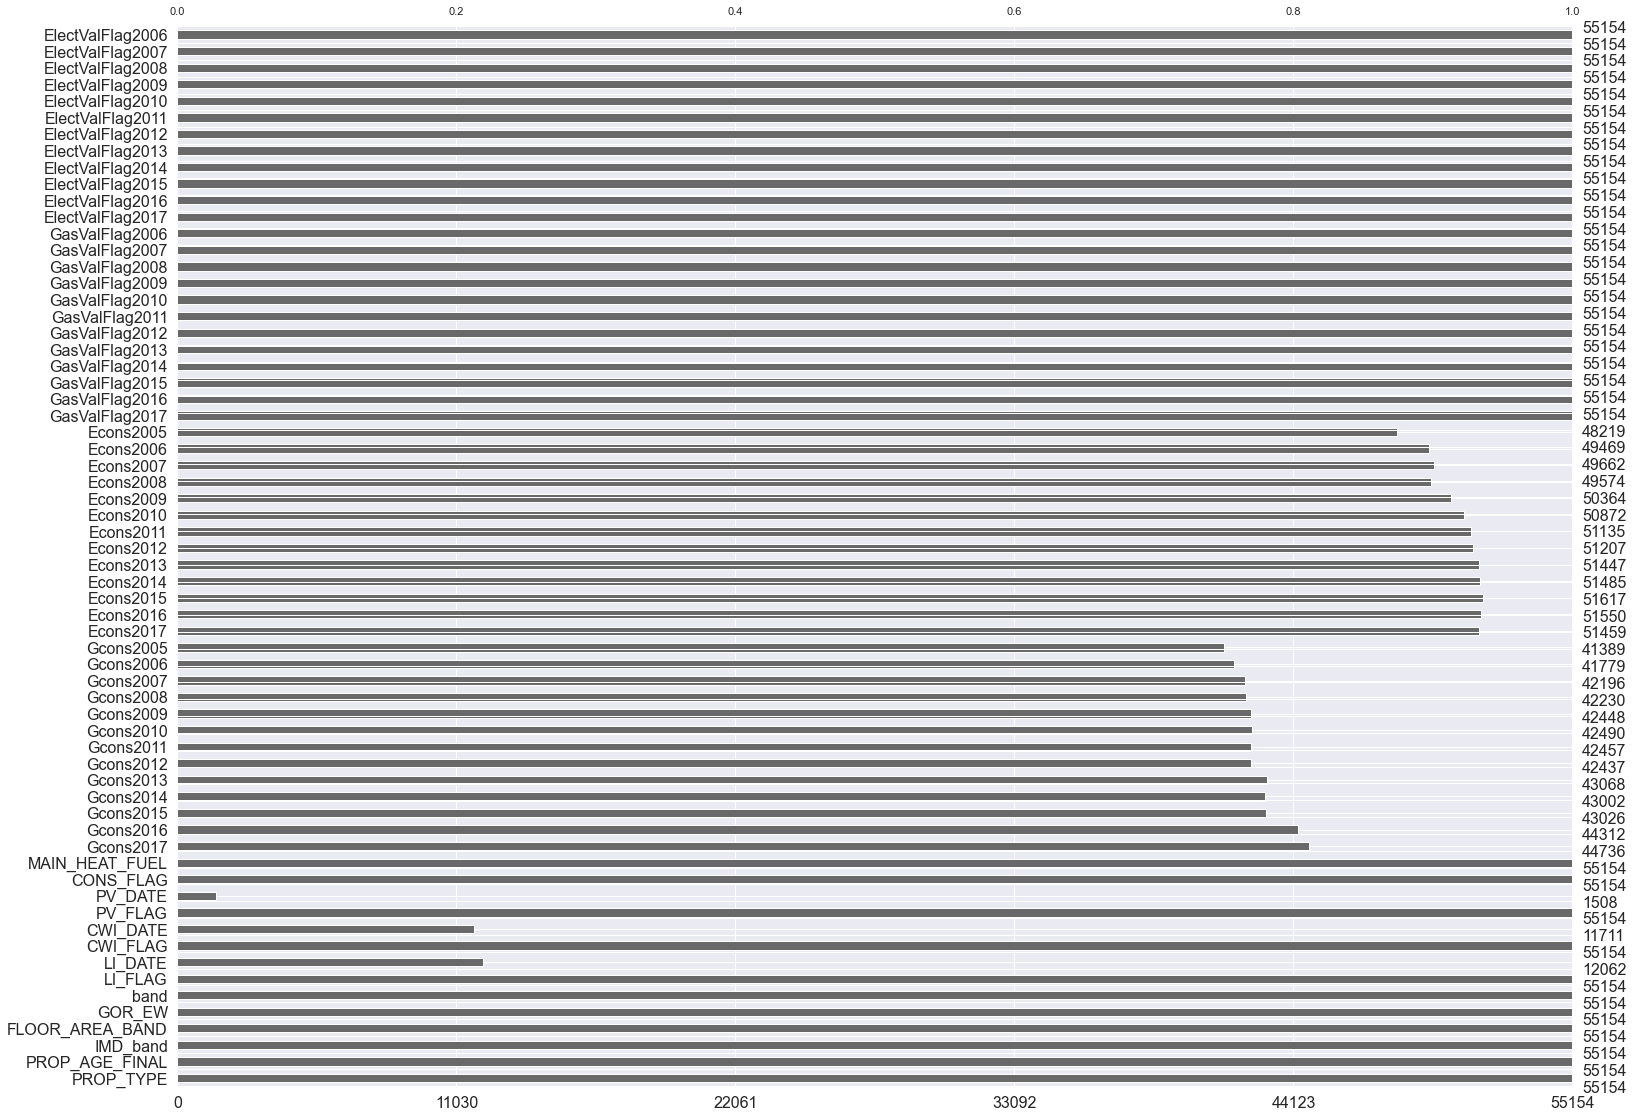

In [87]:
msno.bar(df);

In [88]:
df.dtypes

PROP_TYPE           object
PROP_AGE_FINAL       int64
IMD_band             int64
FLOOR_AREA_BAND      int64
GOR_EW              object
                     ...  
ElectValFlag2010    object
ElectValFlag2009    object
ElectValFlag2008    object
ElectValFlag2007    object
ElectValFlag2006    object
Length: 64, dtype: object

In [89]:
df = df.fillna(0)

In [90]:
#Create a new colomn: average annual electricity consumption

df['AVG_Econs'] = df[['Econs2017', 'Econs2016', 'Econs2015', 'Econs2014', 'Econs2013',
                      'Econs2012', 'Econs2011', 'Econs2010', 'Econs2009', 'Econs2008', 
                      'Econs2007', 'Econs2006', 'Econs2005']].mean(axis=1)
df

,PROP_TYPE,PROP_AGE_FINAL,IMD_band,FLOOR_AREA_BAND,GOR_EW,band,LI_FLAG,LI_DATE,CWI_FLAG,CWI_DATE,...,ElectValFlag2014,ElectValFlag2013,ElectValFlag2012,ElectValFlag2011,ElectValFlag2010,ElectValFlag2009,ElectValFlag2008,ElectValFlag2007,ElectValFlag2006,AVG_Econs
0,Bungalow,102,4,2,E12000001,A,0,0.0,0,0.0,...,V,V,V,V,V,V,V,V,V,1130.769231
1,Bungalow,102,1,2,E12000001,A,0,0.0,0,0.0,...,V,V,V,L,V,V,V,V,V,2423.076923
2,Bungalow,102,5,2,E12000001,B,0,0.0,0,0.0,...,V,V,V,V,V,V,V,V,V,4923.076923
3,Bungalow,102,2,2,E12000001,A,0,0.0,0,0.0,...,V,V,V,V,V,V,V,V,V,3484.615385
4,Bungalow,102,3,2,E12000001,C,1,2008.0,1,2012.0,...,V,V,V,V,V,V,V,V,V,4015.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55149,Semi detached,104,4,2,W99999999,C,0,0.0,0,0.0,...,V,V,V,V,V,V,o,V,V,2553.846154
55150,Semi detached,104,3,2,W99999999,C,0,0.0,0,0.0,...,V,V,V,V,V,V,V,o,o,3400.000000
55151,Semi detached,104,2,3,W99999999,C,0,0.0,0,0.0,...,V,V,V,V,V,o,o,o,o,2292.307692
55152,Semi detached,104,5,3,W99999999,C,0,0.0,0,0.0,...,V,V,V,V,V,o,o,o,o,2184.615385


In [91]:
#Create a new colomn: average annual gas consumption

df['AVG_Gcons'] = df[['Gcons2017', 'Gcons2016', 'Gcons2015', 'Gcons2014', 'Gcons2013',
       'Gcons2012', 'Gcons2011', 'Gcons2010', 'Gcons2009', 'Gcons2008',
       'Gcons2007', 'Gcons2006', 'Gcons2005']].mean(axis=1)

df

,PROP_TYPE,PROP_AGE_FINAL,IMD_band,FLOOR_AREA_BAND,GOR_EW,band,LI_FLAG,LI_DATE,CWI_FLAG,CWI_DATE,...,ElectValFlag2013,ElectValFlag2012,ElectValFlag2011,ElectValFlag2010,ElectValFlag2009,ElectValFlag2008,ElectValFlag2007,ElectValFlag2006,AVG_Econs,AVG_Gcons
0,Bungalow,102,4,2,E12000001,A,0,0.0,0,0.0,...,V,V,V,V,V,V,V,V,1130.769231,2415.384615
1,Bungalow,102,1,2,E12000001,A,0,0.0,0,0.0,...,V,V,L,V,V,V,V,V,2423.076923,6769.230769
2,Bungalow,102,5,2,E12000001,B,0,0.0,0,0.0,...,V,V,V,V,V,V,V,V,4923.076923,13323.076923
3,Bungalow,102,2,2,E12000001,A,0,0.0,0,0.0,...,V,V,V,V,V,V,V,V,3484.615385,17300.000000
4,Bungalow,102,3,2,E12000001,C,1,2008.0,1,2012.0,...,V,V,V,V,V,V,V,V,4015.384615,20153.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55149,Semi detached,104,4,2,W99999999,C,0,0.0,0,0.0,...,V,V,V,V,V,o,V,V,2553.846154,11253.846154
55150,Semi detached,104,3,2,W99999999,C,0,0.0,0,0.0,...,V,V,V,V,V,V,o,o,3400.000000,0.000000
55151,Semi detached,104,2,3,W99999999,C,0,0.0,0,0.0,...,V,V,V,V,o,o,o,o,2292.307692,2430.769231
55152,Semi detached,104,5,3,W99999999,C,0,0.0,0,0.0,...,V,V,V,V,o,o,o,o,2184.615385,1907.692308


In [163]:
df['PROP_AGE_FINAL'] = df['PROP_AGE_FINAL'].replace({'101': 'before 1930', '102': '1930-1949', '103': '1950-1966', 
                                                     '104': '1967-1982', '105': '1983-1995', '106': '1996 onwards'})

#101	before 1930
#102	1930-1949 
#103	1950-1966
#104	1967-1982
#105	1983-1995
#106	1996 onwards

In [93]:
# Transfrom the 'band' colomn to numeric
def map_values(row, values_dict):
    return values_dict[row]

values_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5,
                                 'F': 6, 'G': 7, 'H': 8, 'I': 9}

df['band_num'] = df['band'].apply(map_values, args = (values_dict,))


In [94]:
#Transform it to dummy variable : A, B = 1; C and higher - 0

df["EE_BAND"] = np.where(
   (df.band_num > 2), 
   "1", 
   "0"
)
df['EE_BAND'] = pd.to_numeric(df['EE_BAND'])
df.head()


,PROP_TYPE,PROP_AGE_FINAL,IMD_band,FLOOR_AREA_BAND,GOR_EW,band,LI_FLAG,LI_DATE,CWI_FLAG,CWI_DATE,...,ElectValFlag2011,ElectValFlag2010,ElectValFlag2009,ElectValFlag2008,ElectValFlag2007,ElectValFlag2006,AVG_Econs,AVG_Gcons,band_num,EE_BAND
0,Bungalow,102,4,2,E12000001,A,0,0.0,0,0.0,...,V,V,V,V,V,V,1130.769231,2415.384615,1,0
1,Bungalow,102,1,2,E12000001,A,0,0.0,0,0.0,...,L,V,V,V,V,V,2423.076923,6769.230769,1,0
2,Bungalow,102,5,2,E12000001,B,0,0.0,0,0.0,...,V,V,V,V,V,V,4923.076923,13323.076923,2,0
3,Bungalow,102,2,2,E12000001,A,0,0.0,0,0.0,...,V,V,V,V,V,V,3484.615385,17300.000000,1,0
4,Bungalow,102,3,2,E12000001,C,1,2008.0,1,2012.0,...,V,V,V,V,V,V,4015.384615,20153.846154,3,1


In [95]:
# Create a new Dataframe that include the code, region, longutide and latitude to create the geographical maps

geo = {
    'GOR_EW':["E12000001", "E12000002", "E12000003", "E12000004", "E12000005", "E12000006", "E12000007", "E12000008", "E12000009", "W99999999"],
   'region':["North East", "North West", "Yorkshire and The Humber", "East Midlands", "West Midlands", "East of England", "London", "South East", "South West", "Wales"],
    'lat':[55.041, 53.6221, 53.9062, 53.0452, 52.4751, 52.1911, 51.5072, 51.1781, 50.7772, 52.1307],
    'long':[-1.651, -2.5945, -1.0334, -0.3982, -1.8298, 0.1927, -0.1276, -0.5596, -3.9995, -3.7837]
}

geo_data = pd.DataFrame(geo)
geo_data.head()


,GOR_EW,region,lat,long
0,E12000001,North East,55.0410,-1.6510
1,E12000002,North West,53.6221,-2.5945
2,E12000003,Yorkshire and The Humber,53.9062,-1.0334
3,E12000004,East Midlands,53.0452,-0.3982
4,E12000005,West Midlands,52.4751,-1.8298


In [96]:
df = df.merge(geo_data, on='GOR_EW', how='left')

In [97]:
df = df.reset_index(drop=True)

In [171]:
#Correlation matrix

corr_df = df[['PROP_AGE_FINAL', 'FLOOR_AREA_BAND', 
            'LI_FLAG', 'CWI_FLAG', 'PV_FLAG', 'IMD_band',
            'AVG_Econs', 'AVG_Gcons', 'EE_BAND', 'MAIN_HEAT_FUEL']]

corrMatrix = corr_df.corr()
print (corrMatrix)


                 PROP_AGE_FINAL  FLOOR_AREA_BAND   LI_FLAG  CWI_FLAG  \
PROP_AGE_FINAL         1.000000        -0.123645 -0.100286  0.019324   
FLOOR_AREA_BAND       -0.123645         1.000000  0.056913  0.000079   
LI_FLAG               -0.100286         0.056913  1.000000  0.244736   
CWI_FLAG               0.019324         0.000079  0.244736  1.000000   
PV_FLAG                0.024351         0.075360  0.035828  0.037735   
IMD_band               0.103071         0.283691 -0.042930  0.002567   
AVG_Econs             -0.090874         0.282355 -0.051407 -0.052333   
AVG_Gcons             -0.220896         0.400171  0.110247  0.089949   
EE_BAND                0.112034         0.423033 -0.057092 -0.024613   
MAIN_HEAT_FUEL         0.114399        -0.127956 -0.109753 -0.112377   

                  PV_FLAG  IMD_band  AVG_Econs  AVG_Gcons   EE_BAND  \
PROP_AGE_FINAL   0.024351  0.103071  -0.090874  -0.220896  0.112034   
FLOOR_AREA_BAND  0.075360  0.283691   0.282355   0.400171  0.4230

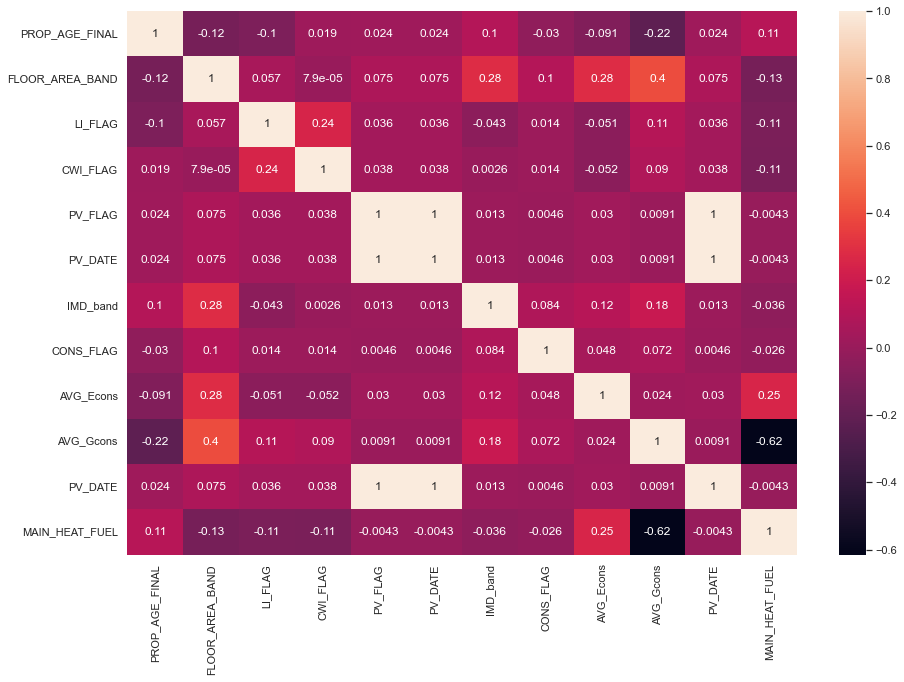

In [168]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

/Users/olgaemelianova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/olgaemelianova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/olgaemelianova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

Text(0.5, 1.0, 'EE_BAND')

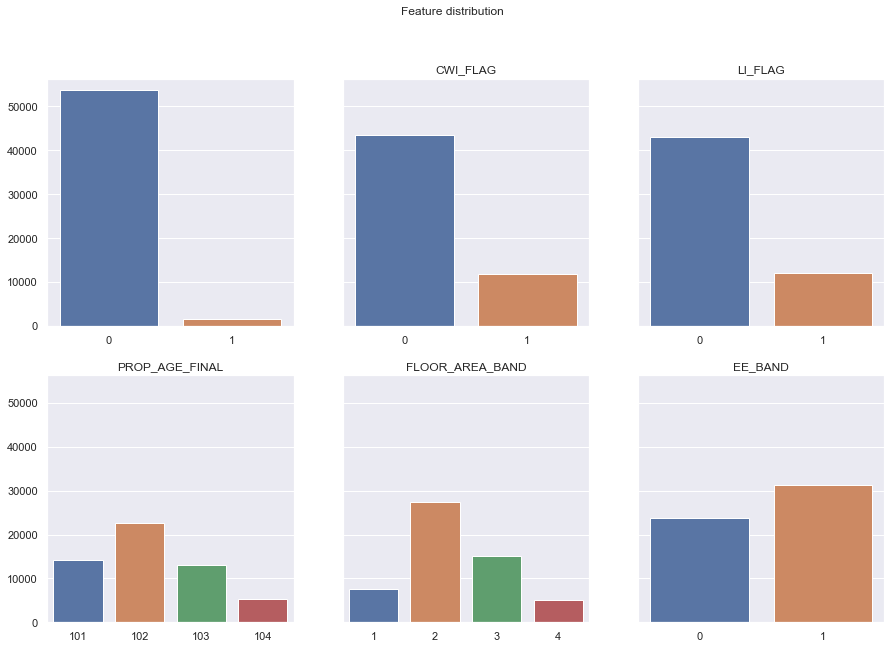

In [100]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
fig.suptitle('Feature distribution')

sns.barplot(df['PV_FLAG'].value_counts().index,df['PV_FLAG'].value_counts().values,ax=axes[0,0])
axes[0,1].set_title("PV_FLAG")

sns.barplot(df['CWI_FLAG'].value_counts().index,df['CWI_FLAG'].value_counts().values,ax=axes[0,1])
axes[0,1].set_title("CWI_FLAG")

sns.barplot(df['LI_FLAG'].value_counts().index,df['LI_FLAG'].value_counts().values,ax=axes[0,2])
axes[0,2].set_title("LI_FLAG")

sns.barplot(df['PROP_AGE_FINAL'].value_counts().index,df['PROP_AGE_FINAL'].value_counts().values,ax=axes[1,0])
axes[1,0].set_title("PROP_AGE_FINAL")

sns.barplot(df['FLOOR_AREA_BAND'].value_counts().index,df['FLOOR_AREA_BAND'].value_counts().values,ax=axes[1,1])
axes[1,1].set_title("FLOOR_AREA_BAND")

sns.barplot(df['EE_BAND'].value_counts().index,df['EE_BAND'].value_counts().values,ax=axes[1,2])
axes[1,2].set_title("EE_BAND")



In [102]:
df["id"] = df.index + 1


In [156]:
df

,PROP_TYPE,PROP_AGE_FINAL,IMD_band,FLOOR_AREA_BAND,GOR_EW,band,LI_FLAG,LI_DATE,CWI_FLAG,CWI_DATE,...,ElectValFlag2007,ElectValFlag2006,AVG_Econs,AVG_Gcons,band_num,EE_BAND,region,lat,long,id
0,Bungalow,102,4,2,E12000001,A,0,0.0,0,0.0,...,V,V,1130.769231,2415.384615,1,0,North East,55.0410,-1.6510,1
1,Bungalow,102,1,2,E12000001,A,0,0.0,0,0.0,...,V,V,2423.076923,6769.230769,1,0,North East,55.0410,-1.6510,2
2,Bungalow,102,5,2,E12000001,B,0,0.0,0,0.0,...,V,V,4923.076923,13323.076923,2,0,North East,55.0410,-1.6510,3
3,Bungalow,102,2,2,E12000001,A,0,0.0,0,0.0,...,V,V,3484.615385,17300.000000,1,0,North East,55.0410,-1.6510,4
4,Bungalow,102,3,2,E12000001,C,1,2008.0,1,2012.0,...,V,V,4015.384615,20153.846154,3,1,North East,55.0410,-1.6510,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55149,Semi detached,104,4,2,W99999999,C,0,0.0,0,0.0,...,V,V,2553.846154,11253.846154,3,1,Wales,52.1307,-3.7837,55150
55150,Semi detached,104,3,2,W99999999,C,0,0.0,0,0.0,...,o,o,3400.000000,0.000000,3,1,Wales,52.1307,-3.7837,55151
55151,Semi detached,104,2,3,W99999999,C,0,0.0,0,0.0,...,o,o,2292.307692,2430.769231,3,1,Wales,52.1307,-3.7837,55152
55152,Semi detached,104,5,3,W99999999,C,0,0.0,0,0.0,...,o,o,2184.615385,1907.692308,3,1,Wales,52.1307,-3.7837,55153


In [103]:
# Create a new dataframe that have all condumption data in one column 

all_cons = df[['id', 'Gcons2017', 'Gcons2016',
       'Gcons2015', 'Gcons2014', 'Gcons2013', 'Gcons2012', 'Gcons2011',
       'Gcons2010', 'Gcons2009', 'Gcons2008', 'Gcons2007', 'Gcons2006',
       'Gcons2005', 'Econs2017', 'Econs2016', 'Econs2015', 'Econs2014',
       'Econs2013', 'Econs2012', 'Econs2011', 'Econs2010', 'Econs2009',
       'Econs2008', 'Econs2007', 'Econs2006', 'Econs2005']]

all_cons_dep = pd.melt(all_cons, id_vars=['id'], value_vars=['Gcons2017', 'Gcons2016',
       'Gcons2015', 'Gcons2014', 'Gcons2013', 'Gcons2012', 'Gcons2011',
       'Gcons2010', 'Gcons2009', 'Gcons2008', 'Gcons2007', 'Gcons2006',
       'Gcons2005', 'Econs2017', 'Econs2016', 'Econs2015', 'Econs2014',
       'Econs2013', 'Econs2012', 'Econs2011', 'Econs2010', 'Econs2009',
       'Econs2008', 'Econs2007', 'Econs2006', 'Econs2005'])



In [104]:
all_cons_dep['energy_source'] = all_cons_dep['variable'].str[:1]
all_cons_dep['year'] = all_cons_dep['variable'].str[-4:]


In [105]:
all_cons_dep.rename(columns = {'value':'consumption, kw/h'}, inplace = True)
all_cons_dep = all_cons_dep[['id', 'consumption, kw/h', 'energy_source', 'year']]
all_cons_sort = all_cons_dep.sort_values(by=['year'])

In [106]:
all_cons_sort.head()

,id,"consumption, kw/h",energy_source,year
717001,55154,0.0,G,2005
698611,36764,39000.0,G,2005
698612,36765,0.0,G,2005
698613,36766,16400.0,G,2005
698614,36767,0.0,G,2005


<AxesSubplot:xlabel='year', ylabel='consumption, kw/h'>

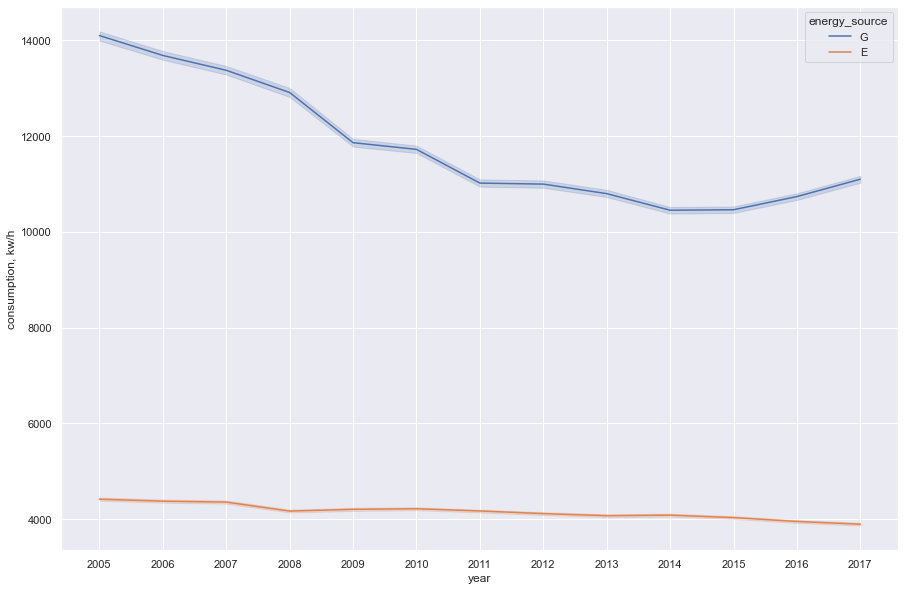

In [107]:
#Average Electricity and Gas Consumption by year


sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=all_cons_sort, x="year", y="consumption, kw/h", hue="energy_source")

In [108]:
#Machine learnig test

In [190]:

x = df[["LI_FLAG", "CWI_FLAG", "PV_FLAG", "CONS_FLAG", "EE_BAND"]]
#separate the other attributes from the predicting attribute

In [191]:
y = df[["AVG_Gcons"]]
#separte the predicting attribute into Y for model training 

In [192]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for 
#model validation.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [193]:
data_non_sparse = x_train.drop(["LI_FLAG", "CWI_FLAG", "PV_FLAG", "CONS_FLAG", "EE_BAND"],axis=1)
data_non_sparse_test = x_test.drop(["LI_FLAG", "CWI_FLAG", "PV_FLAG", "CONS_FLAG", "EE_BAND"],axis=1)

In [194]:
X_scaled = (data_non_sparse-data_non_sparse.mean())/data_non_sparse.std()
X_scaled_test = (data_non_sparse_test-data_non_sparse.mean())/data_non_sparse.std()

X_scaled[["LI_FLAG", "CWI_FLAG", "PV_FLAG", "CONS_FLAG", "EE_BAND"]] = x_train[["LI_FLAG", "CWI_FLAG", "PV_FLAG", "CONS_FLAG", "EE_BAND"]]
X_scaled_test[["LI_FLAG", "CWI_FLAG", "PV_FLAG", "CONS_FLAG", "EE_BAND"]] = x_test[["LI_FLAG", "CWI_FLAG", "PV_FLAG", "CONS_FLAG", "EE_BAND"]]

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
lm = LinearRegression()
#loading the model constructor
# lm.fit(x_train,y_train)
lm.fit(X_scaled,y_train)

#training or fitting the train data into the model

LinearRegression()

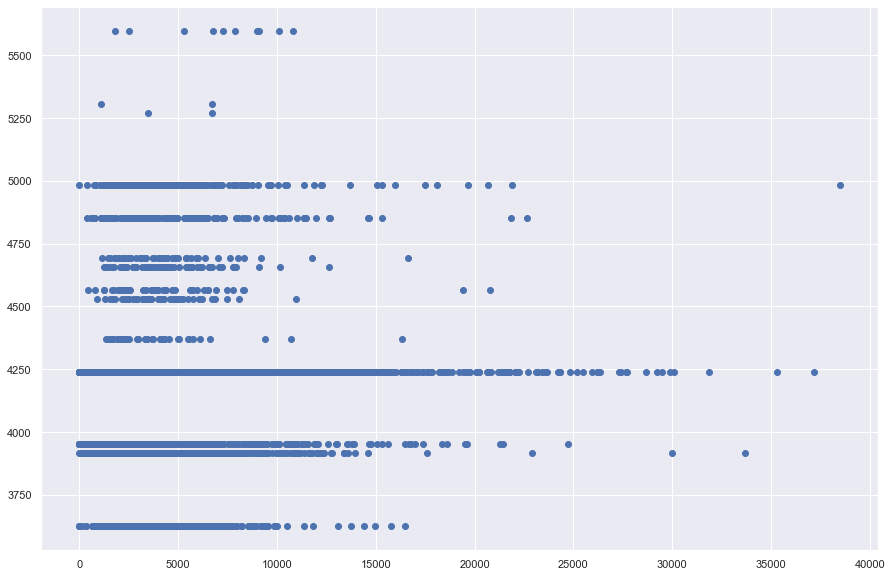

In [116]:
predictions = lm.predict(X_scaled_test)
predictions_train = lm.predict(X_scaled)
# predictions = lm.predict(X_scaled)
plt.scatter(y_test,predictions)

/Users/olgaemelianova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

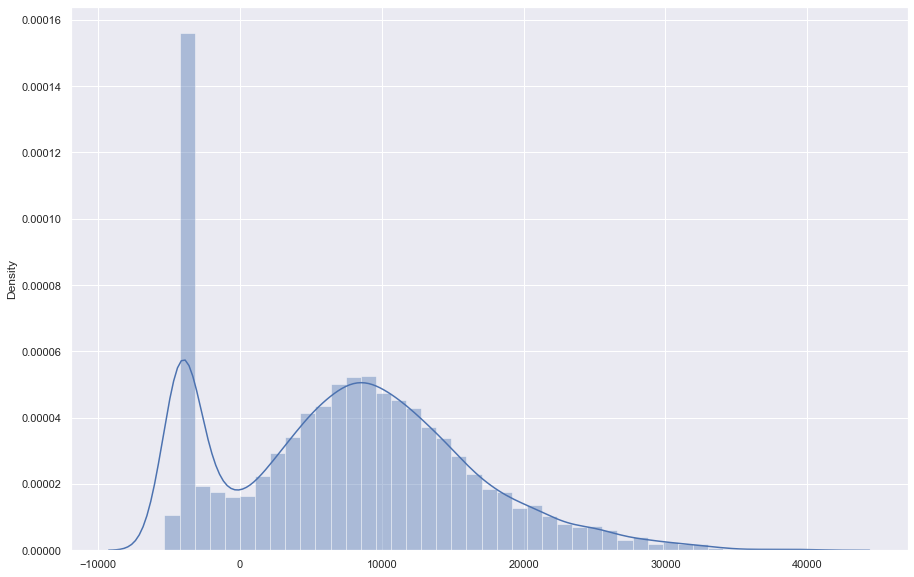

In [197]:
sns.distplot((y_test-predictions))

In [118]:
# get the additional data for the gas bill amount


bill_data = pd.read_excel(io="average_annual_domestic_gas_bills.xlsx", 
                          sheet_name=4,
                          header=15)
                          
                          
                          

In [182]:
bill_data.head()

,Year,Standard Consumption,Region,LDZ area,Bill range [Note 1],Credit: Unit cost (Pence per kWh),Credit: Bill (Pounds),Direct debit: Unit cost (Pence per kWh),Direct debit: Bill (Pounds),Prepayment: Unit cost (Pence per kWh),Prepayment: Bill (Pounds),Overall: Unit cost (Pence per kWh),Overall: Bill (Pounds)
804,2019,15000,South West,South West,Average,4.947776,742.166450,4.464411,669.661687,4.764197,714.629512,4.582556,687.383421
805,2019,15000,Southern,Southern,Average,4.946793,742.019024,4.411109,661.666310,4.742864,711.429651,4.532320,679.848059
806,2019,15000,West Midlands,West Midlands,Average,4.780593,717.088924,4.260443,639.066500,4.609810,691.471513,4.404373,660.655983
807,2019,15000,Yorkshire,Yorkshire,Average,4.675811,701.371634,4.164062,624.609320,4.521406,678.210873,4.305922,645.888372
808,2019,15000,Great Britain,Great Britain,Average,4.771085,715.662814,4.286960,643.044027,4.585263,687.789494,4.418874,662.831079


In [120]:
bill_data.columns

Index(['Year', 'Standard Consumption', 'Region', 'LDZ area',
       'Bill range [Note 1]', 'Credit: Unit cost (Pence per kWh)',
       'Credit: Bill (Pounds)', 'Direct debit: Unit cost (Pence per kWh)',
       'Direct debit: Bill (Pounds)', 'Prepayment: Unit cost (Pence per kWh)',
       'Prepayment: Bill (Pounds)', 'Overall: Unit cost (Pence per kWh)',
       'Overall: Bill (Pounds)'],
      dtype='object')

In [121]:
# get the additional data for the gas import origine


import_data = pd.read_excel(io="uk_gas_import.xlsx", 
                          sheet_name="Annual (GWh)",
                          header=4)
                          

In [122]:
import_data=import_data.rename(columns={'Bacton to Zeebrugge Interconnector':'Bacton to Zeebrugge Interconnector pipeline(Belgium)',
                                        'Balgzand to Bacton (BBL)':'Netherlands pipeline',
                                        'Total Norway pipeline': 'Norway pipeline'})



In [123]:
import_data=import_data[['Year', 'Bacton to Zeebrugge Interconnector pipeline(Belgium)',
       'Netherlands pipeline', 'Norway pipeline',
       'Total pipeline', 'Qatar', 'Russia', 'Trinidad & Tobago', 'USA',
       'Algeria', 'Angola', 'Australia', 'Belgium', 'Cameroon',
       'Dominican Republic', 'Egypt', 'Equatorial Guinea', 'France',
       'Netherlands', 'Nigeria', 'Norway', 'Peru', 'Yemen', 'Total LNG',
       'Total Imports']]


In [124]:

import_data = import_data[:-1]

import_data.tail()

,Year,Bacton to Zeebrugge Interconnector pipeline(Belgium),Netherlands pipeline,Norway pipeline,Total pipeline,Qatar,Russia,Trinidad & Tobago,USA,Algeria,...,Egypt,Equatorial Guinea,France,Netherlands,Nigeria,Norway,Peru,Yemen,Total LNG,Total Imports
16,2016,15414.05,47443.97,347004.80,409862.82,107896.40,0.00,1434.11,0.00,2831.18,...,72.03,0.00,0.00,0.0,1062.20,2815.71,0.00,0.0,117004.70,526867.54
17,2017,29428.26,20765.77,393417.34,443611.37,63369.48,1072.33,3241.83,998.10,2457.59,...,0.00,0.00,0.00,0.0,965.08,0.00,895.93,0.0,73408.61,517019.99
18,2018,35527.39,30095.79,373346.73,438969.91,31699.36,16684.45,6702.83,13206.75,2435.73,...,1520.92,862.71,0.00,0.0,852.33,3262.12,883.44,0.0,78110.61,517080.50
19,2019,3228.38,17570.15,295927.75,316726.28,92900.87,31378.92,9858.14,31135.42,10887.12,...,0.00,2567.70,0.00,897.4,3518.39,6522.30,2892.01,0.0,194446.55,511172.83
20,2020,3553.53,11072.51,263495.39,278121.43,96903.87,24634.69,11189.91,53439.06,487.53,...,2040.44,0.00,1079.17,0.0,3687.66,2660.15,0.00,0.0,200066.47,478187.89


In [173]:
# get the additional data for the gas price historic

gas_price_data = pd.read_csv("gas_prices.csv", delimiter = ',')
gas_price_data = gas_price_data.rename(columns={"PNGASEUUSDM": "price,£"})

In [174]:
gas_price_data['year'] = gas_price_data['DATE'].str[-4:]

In [181]:
gas_price_data.head()

,DATE,"price,£",year
0,01/01/1990,1.73,1990
1,01/02/1990,1.73,1990
2,01/03/1990,1.73,1990
3,01/04/1990,2.11,1990
4,01/05/1990,2.11,1990


In [172]:
gas_price_data.columns

Index(['DATE', 'price,£', 'year'], dtype='object')

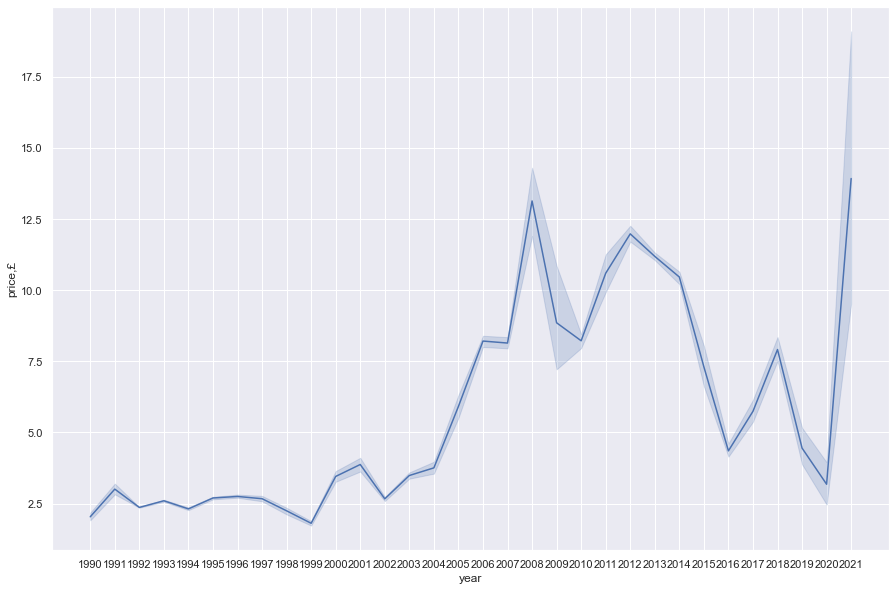

In [129]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="year", y="price,£", data = gas_price_data);

In [176]:
# get the additional data for the PV installation campaign details


pv_data = pd.read_csv("photovoltaic_data_uk.csv", delimiter = ',')
pv_data['year'] = pv_data['period'].str[-4:]
pv_data.tail()

,period,cumulative capacity(mw),cumulative count,year
141,Oct\n2021,13649.59089,1109525,2021
142,Nov\n2021,13675.44704,1116638,2021
143,Dec\n2021,13693.30654,1121820,2021
144,Jan\n2022,13715.69392,1127935,2022
145,Feb\n2022,13743.31454,1135501,2022


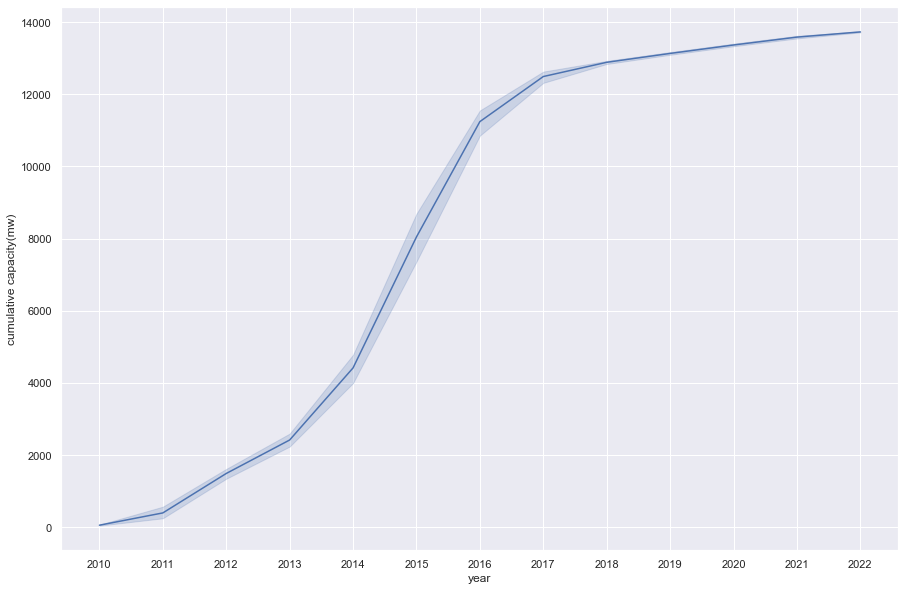

In [131]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="year", y="cumulative capacity(mw)", data = pv_data);



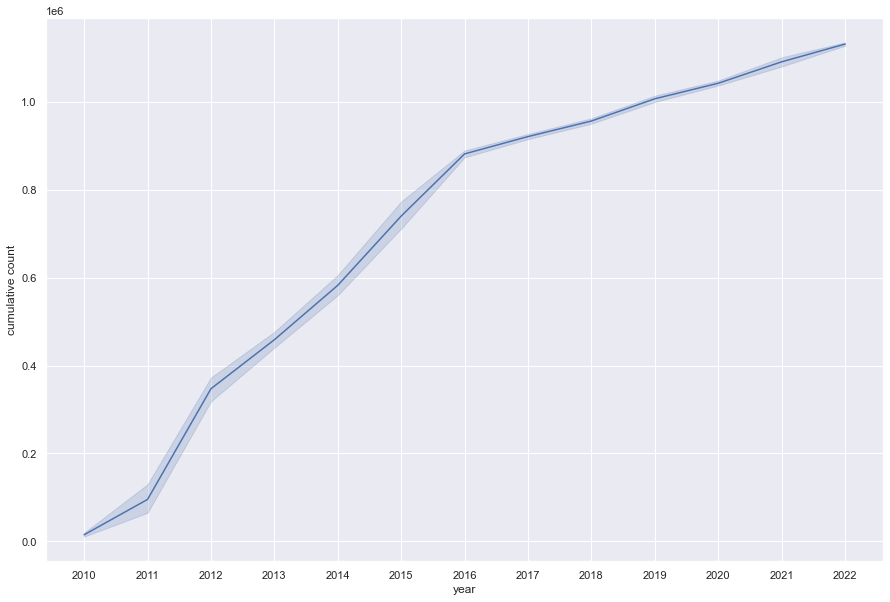

In [132]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="year", y="cumulative count", data = pv_data);

In [133]:
import geopandas as geopd
from datetime import datetime, timedelta
import requests

In [134]:
# import the folium library
import folium

In [135]:


# initialize the map and store it in a m object
m = folium.Map(location=[40, -95], zoom_start=4)

# show the map
m

In [152]:
import json

In [159]:
rg = json.load(open('uk_regions.geojson'))
rg

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-2.03, 55.77],
       [-2.02, 55.77],
       [-2.03, 55.77],
       [-2.04, 55.76],
       [-2.05, 55.76],
       [-2.07, 55.76],
       [-2.09, 55.76],
       [-2.24, 55.65],
       [-2.33, 55.63],
       [-2.31, 55.62],
       [-2.23, 55.52],
       [-2.2, 55.48],
       [-2.18, 55.47],
       [-2.33, 55.41],
       [-2.34, 55.39],
       [-2.33, 55.39],
       [-2.34, 55.39],
       [-2.33, 55.39],
       [-2.34, 55.37],
       [-2.64, 55.26],
       [-2.63, 55.25],
       [-2.63, 55.23],
       [-2.69, 55.19],
       [-2.53, 55.08],
       [-2.53, 55.09],
       [-2.53, 55.08],
       [-2.53, 55.09],
       [-2.52, 55.09],
       [-2.5, 55.09],
       [-2.49, 55.09],
       [-2.5, 55.09],
       [-2.49, 55.09],
       [-2.5, 55.07],
       [-2.51, 55.04],
       [-2.51, 55.03],
       [-2.51, 55.04],
       [-2.51, 55.03],
       [-2.6, 54.97],
       [-2.6

In [161]:
folium.Choropleth(
    geo_data=rg,
    name="choropleth",
    data=df,
    columns=["region", "IMD_band"],
    key_on="features.properties.rgn19nm",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="IMD_band",
).add_to(m)

folium.LayerControl().add_to(m)

m

AttributeError: 'NoneType' object has no attribute 'get'